In [161]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

# Se importan paquetes de análisis de datos- Proceso
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Se importa Base de ventas Fusión Agro
BaseVentasFusionAgro = pd.read_csv("15.csv")
Zona = pd.read_csv("Zona.csv")
Producto = pd.read_csv("Producto.csv")
Cultivo = pd.read_csv("Cultivo.csv")
Periodo = pd.read_csv("Periodo.csv")

# Se incluyen las categorías en la base
Ventas_zona = BaseVentasFusionAgro.merge(Zona, how='left', left_on='Cliente', right_on='Cliente')
Ventas_zona_producto = Ventas_zona.merge(Producto, how='left', left_on='Producto_', right_on='Producto')
Ventas_zona_producto_ = Ventas_zona_producto.merge(Periodo, how='left', left_on='Mes', right_on='Mes')
Ventas_zona_producto_cultivo = Ventas_zona_producto_.merge(Cultivo, how='left', left_on='Cultivo', right_on='Cultivo')
Base = Ventas_zona_producto_cultivo.drop(columns=['Producto__x', 'Producto','Cultivo'])

#Limpieza de base (Tipos)
Base['Costo'] = (Base['Costo'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
Base['Venta'] = (Base['Venta'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
Base.Utilidad.astype('float64')
Base.Costo.astype('float64')
Base.Venta.astype('float64')

#Columnas nuevas
Base['Utilidad $M'] = Base['Utilidad']/1000000
Base['Volumen kL'] = Base['Volumen']/1000

Toggle code

In [163]:
#Filtros
Periodoconsiderado_2022 = Ventas_zona_producto_cultivo['Año'] == 2022
T1yT2 = ['T1', 'T2','T3','T4']
Mx = Base['Empresa'] == "01 Mx"
CAC =Base['Empresa'] == "02 CAC"
SUD =Base['Empresa'] == "03 SUD"
IQC =Base['Empresa'] == "04 IQC"
Int =Base['Empresa'] == "05 Int"
#Tablas para gráficas

Mx2022 = Base[Base['Trimestre'].isin(
                T1yT2)&
                Periodoconsiderado_2022 & 
                Mx]
CAC2022 = Base[Base['Trimestre'].isin(
                T1yT2)&
                Periodoconsiderado_2022 & 
                CAC]
SUD2022 = Base[Base['Trimestre'].isin(
                T1yT2)&
                Periodoconsiderado_2022 & 
                SUD]
IQC2022 = Base[Base['Trimestre'].isin(
                T1yT2)&
                Periodoconsiderado_2022 & 
                IQC]
Int2022 = Base[Base['Trimestre'].isin(
                T1yT2)&
                Periodoconsiderado_2022 & 
                Int]

In [164]:
print ("Utilidad de Mx (Plan 2022)")
print ('${:,.3f} M'.format(Mx2022.Utilidad.sum()/1000000) )


Utilidad de Mx (Plan 2022)
$143.122 M


In [165]:
# Plan 2022 desglosado por Zona y categoría- Mx

Mx_ = Mx2022.groupby(
                                                ['Zona','Cliente_']
                                        ).agg(
                                                {'Utilidad $M': 'sum'})

In [166]:
# Plan 2022 desglosado por Zona y categoría- CAC

CAC_ = CAC2022.groupby(
                                                ['Zona','Cliente_']
                                        ).agg(
                                                {'Utilidad $M': 'sum'})
# Plan 2022 desglosado por Zona y categoría- CAC

SUD_ = SUD2022.groupby(
                                                ['País','Cliente_']
                                        ).agg(
                                                {'Utilidad $M': 'sum'})
# Plan 2022 desglosado por Zona y categoría- CAC

IQC_ = IQC2022.groupby(
                                                ['Cliente_','Cliente']
                                        ).agg(
                                                {'Utilidad $M': 'sum'})
# Plan 2022 desglosado por Zona y categoría- CAC

Int_ = Int2022.groupby(
                                                ['País','Cliente_']
                                        ).agg(
                                                {'Utilidad $M': 'sum'})

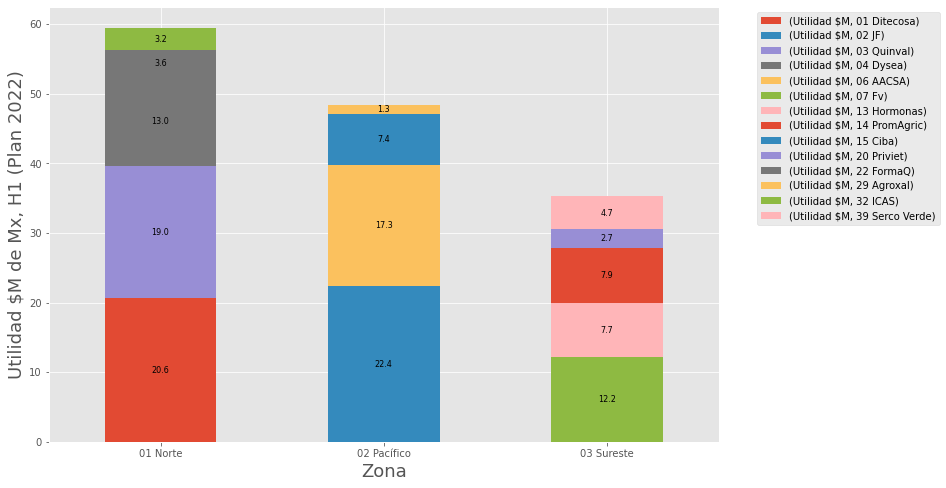

In [167]:
plt.style.use('ggplot')

ax = pd.DataFrame(Mx_.unstack(level = 1)).plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))    
ax.set_ylabel("Utilidad $M de Mx, H1 (Plan 2022)", fontsize=18)
ax.set_xlabel("Zona", fontsize=18)
plt.show()

In [168]:
print ("Utilidad de CAC (Plan 2022)")
print ('${:,.3f} M'.format(CAC2022.Utilidad.sum()/1000000) )

Utilidad de CAC (Plan 2022)
$49.423 M


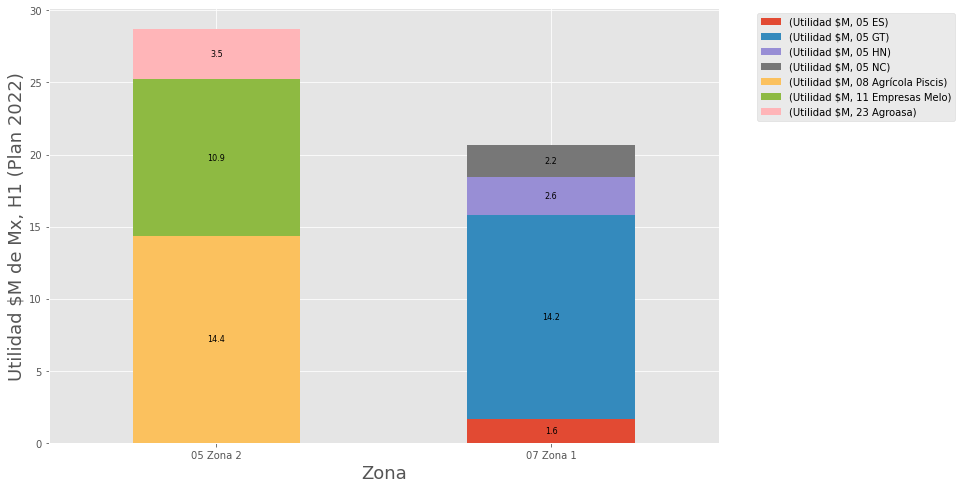

In [169]:
plt.style.use('ggplot')

ax = pd.DataFrame(CAC_.unstack(level = 1)).plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))    
ax.set_ylabel("Utilidad $M de CAC, H1 (Plan 2022)", fontsize=18)
ax.set_xlabel("Zona", fontsize=18)
plt.show()

In [170]:
print ("Utilidad de SUD (Plan 2022)")
print ('${:,.3f} M'.format(SUD2022.Utilidad.sum()/1000000) )

Utilidad de SUD (Plan 2022)
$41.089 M


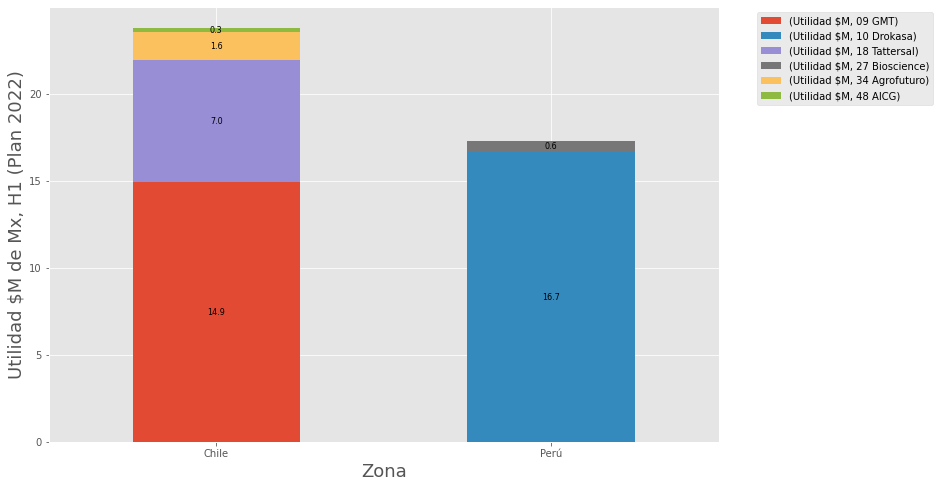

In [171]:
plt.style.use('ggplot')

ax = pd.DataFrame(SUD_.unstack(level = 1)).plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))    
ax.set_ylabel("Utilidad $M de SUD, H1 (Plan 2022)", fontsize=18)
ax.set_xlabel("Zona", fontsize=18)
plt.show()

In [172]:
print ("Utilidad de IqC (Plan 2022)")
print ('${:,.3f} M'.format(IQC2022.Utilidad.sum()/1000000) )

Utilidad de IqC (Plan 2022)
$24.695 M


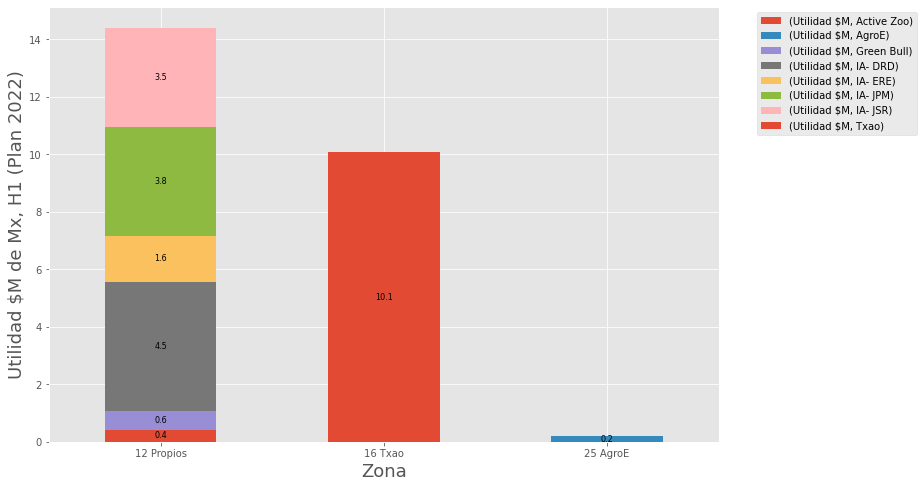

In [173]:
plt.style.use('ggplot')

ax = pd.DataFrame(IQC_.unstack(level = 1)).plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))    
ax.set_ylabel("Utilidad $M de Mx, H1 (Plan 2022)", fontsize=18)
ax.set_xlabel("Zona", fontsize=18)
plt.show()

In [174]:
print ("Utilidad de Int (Plan 2022)")
print ('${:,.3f} M'.format(Int2022.Utilidad.sum()/1000000) )

Utilidad de Int (Plan 2022)
$9.623 M


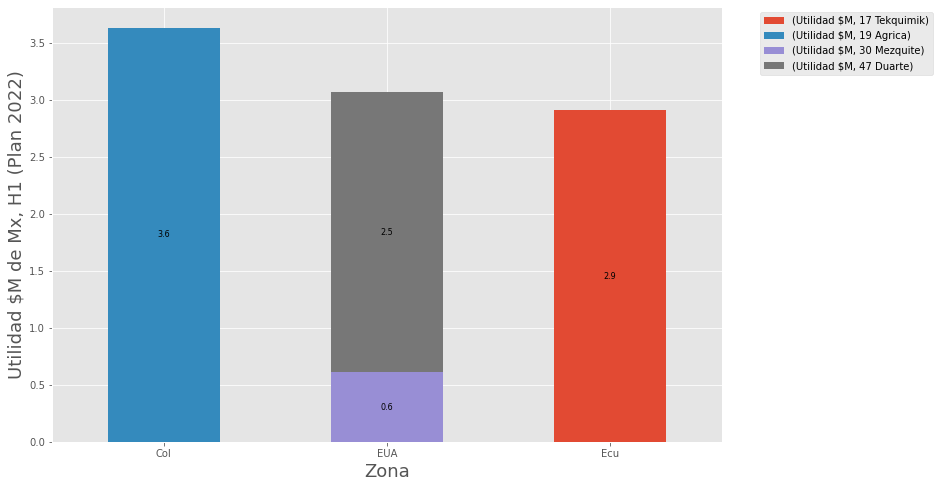

In [175]:
plt.style.use('ggplot')

ax = pd.DataFrame(Int_.unstack(level = 1)).plot(stacked=True, kind='bar', figsize=(12, 8), rot='horizontal')

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.1f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
    
ax.legend(loc='upper left',bbox_to_anchor=(1.05, 1))    
ax.set_ylabel("Utilidad $M de Mx, H1 (Plan 2022)", fontsize=18)
ax.set_xlabel("Zona", fontsize=18)
plt.show()